# Transformation method

In one plot, compare the scaled probability density function and two histograms of outcomes from that distribution. One uses the built-in random number generator for that distribution, the other uses the transformation method:
$$ r = \int_0^t {1\over\tau} e^{-t'/\tau} \, dt'$$
where r is a uniform random number. Solve for t:
$$ t = -\tau \log(1-r)$$

In [1]:
import numpy as np
from scipy import stats
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

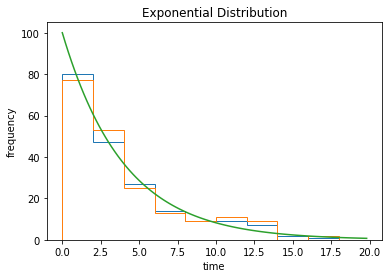

In [2]:
tau = 4.; tMax = 20.; nEvents = 200; binWidth = 2.

tArray = np.arange(0.,tMax,binWidth)
# using built in call
t1 = stats.expon.rvs(scale=tau,size=nEvents)
plt.hist(t1,bins=tArray,histtype='step');

# by transformation method (uniform -> exponential)
t2 = -tau*np.log(1.-stats.uniform.rvs(size=nEvents))
plt.hist(t2,bins=tArray,histtype='step');

# overlay the scaled pdf, using a finer binning
tArrayFine = np.arange(0.,tMax,binWidth/10.)
probabilityDensity = stats.expon.pdf(tArrayFine,scale=tau)*nEvents*binWidth
plt.plot(tArrayFine,probabilityDensity)
plt.title("Exponential Distribution"); plt.xlabel("time"); plt.ylabel("frequency")

plt.show()